#Understaning Data

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('/content/spam.csv')


In [4]:
#display all column
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)


In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df['message'].iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,5572.0,80.489950,59.942907,2.0,36.0,62.0,122.0,910.0
punct,5572.0,4.177495,4.623919,0.0,2.0,3.0,6.0,133.0


##Check missing value

In [9]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


##Check Duplicate Rows

In [10]:
df[df.duplicated()]


,label,message,length,punct
103,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
154,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
207,ham,"As I entered my cabin my PA said, '' Happy B'd...",156,13
223,ham,"Sorry, I'll call later",22,2
326,ham,No calls..messages..missed calls,32,4
...,...,...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...,152,9
5535,ham,"I know you are thinkin malaria. But relax, chi...",329,6
5539,ham,Just sleeping..and surfing,26,2
5553,ham,Hahaha..use your brain dear,27,2


In [11]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [12]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [13]:
df.shape

(5169, 4)

In [14]:
df['label'].value_counts()

,count
label,
ham,4516
spam,653


##The data show unbalancing



##Using Undersampling to make Dataset Balancing.


In [15]:
ham = df[df['label'] == 'ham']
ham.shape

(4516, 4)

In [16]:
spam = df[df['label'] == 'spam']
spam.shape

(653, 4)

In [17]:
ham = ham.sample(spam.shape[0])
ham.shape

(653, 4)

In [18]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)


In [19]:
data.duplicated().sum()

0

In [20]:
data.head(10)

,label,message,length,punct
0,ham,R ü comin back for dinner?,26,1
1,ham,I also thk too fast... Xy suggest one not me. ...,95,7
2,ham,Those ducking chinchillas,25,0
3,ham,It should take about &lt;#&gt; min,36,5
4,ham,I know a few people I can hit up and fuck to t...,52,0
5,ham,"Tonight? Yeah, I'd be down for that",35,3
6,ham,Just buy a pizza. Meat lovers or supreme. U ge...,56,3
7,ham,Sure! I am driving but will reach my destinati...,54,2
8,ham,If you are not coughing then its nothing,40,0
9,ham,Thanks. It was only from tescos but quite nice...,73,3


In [21]:
data.sample(frac=0.10)

,label,message,length,punct
99,ham,"Geeeee ... Your internet is really bad today, ...",50,5
635,ham,"Helloooo... Wake up..! ""Sweet"" ""morning"" ""welc...",109,25
27,ham,"That's cool he'll be here all night, lemme kno...",66,4
508,ham,U should have made an appointment,33,0
303,ham,I will cme i want to go to hos 2morow. After t...,125,3
...,...,...,...,...
81,ham,Where you. What happen,22,1
260,ham,I'm at home. Please call,24,2
389,ham,Got ur mail Dileep.thank you so muchand look f...,205,9
188,ham,God created gap btwn ur fingers so dat sum1 vr...,157,5


#Exploratory Data Analysis

In [22]:
df.groupby('label').mean(numeric_only=True)[['length', 'punct']]


,length,punct
label,,
ham,70.905890,3.830159
spam,137.704441,5.643185


In [23]:
data.groupby('label').mean(numeric_only=True)[['length', 'punct']]


,length,punct
label,,
ham,68.306279,3.684533
spam,137.704441,5.643185


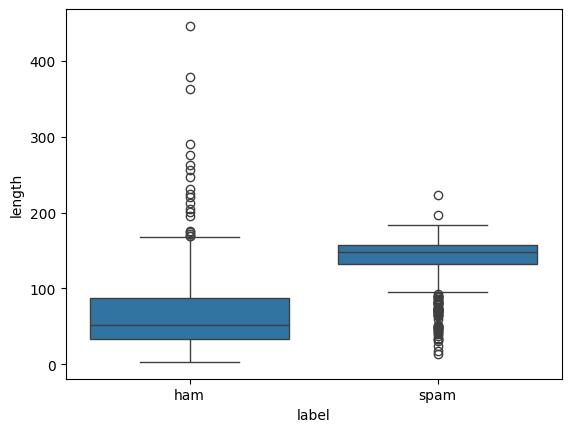

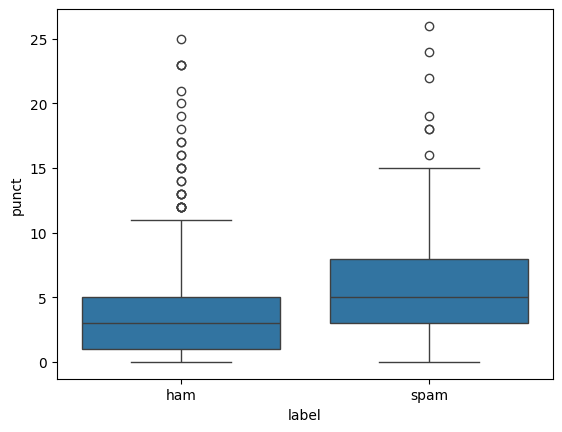

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='label', y='length', data=data)
plt.show()



sns.boxplot(x='label', y='punct', data=data)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

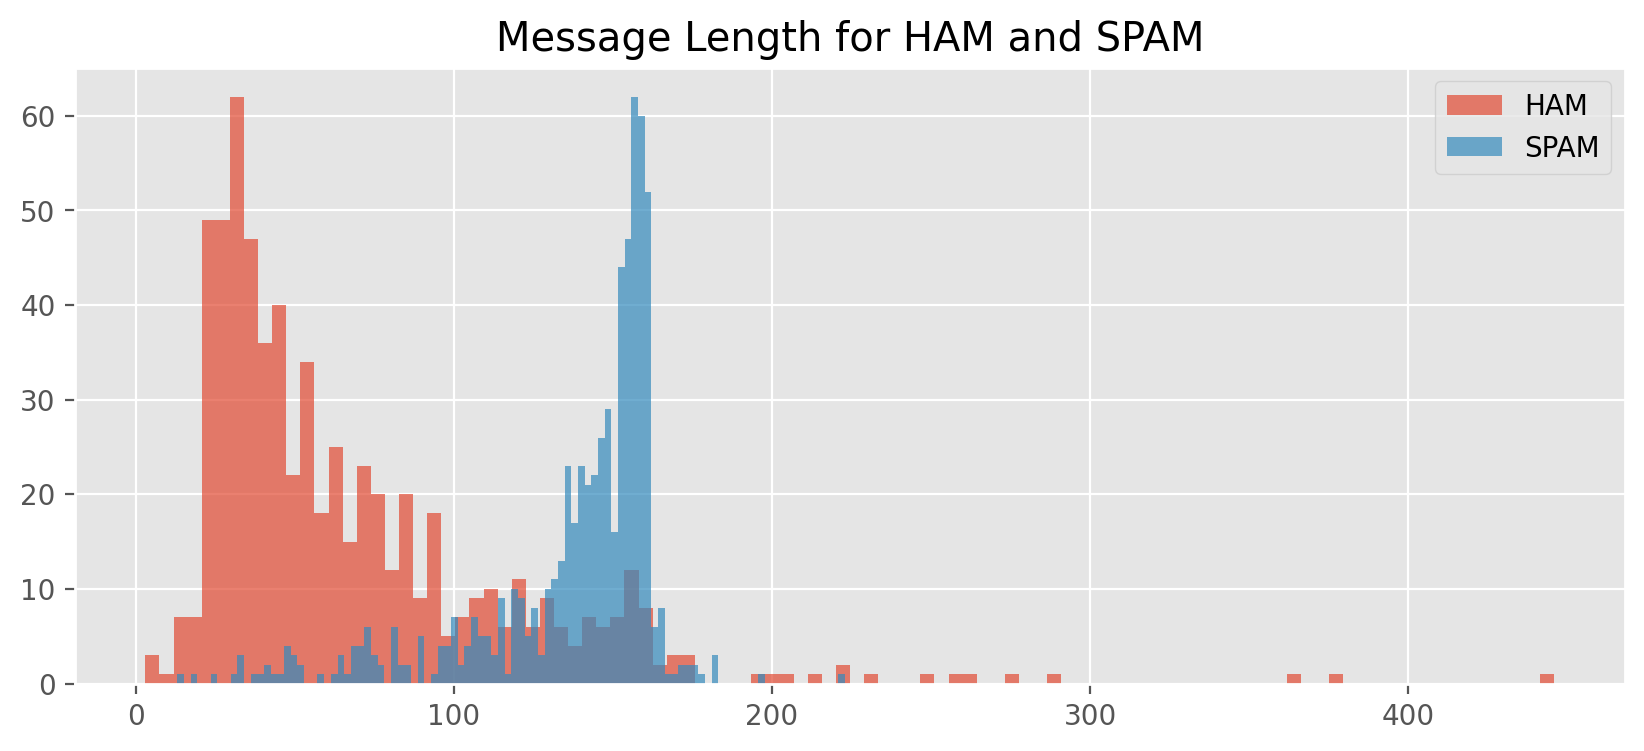

In [25]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Message Length for HAM and SPAM')
plt.legend()
plt.show

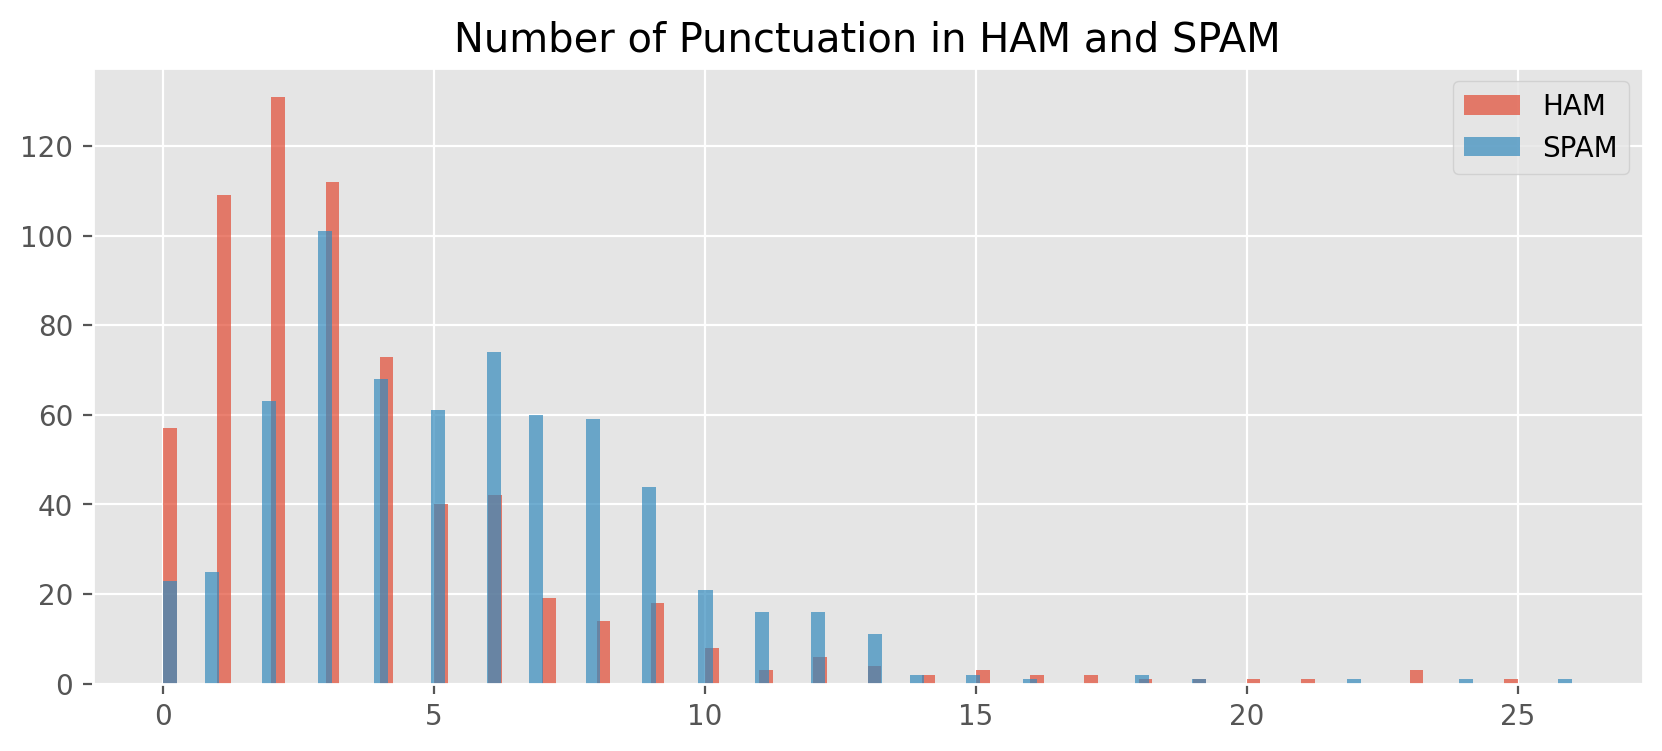

In [26]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Number of Punctuation in HAM and SPAM')
plt.legend()
plt.show()

##Conclusion :
* Message Length: The length of a message can be a useful indicator. If the message is significantly longer compared to regular messages, it might be beneficial to classify it as spam. This is because spam messages tend to be longer in an attempt to grab more attention or provide more details, often including promotions or links.

*  Punctuation Count: The number of punctuation marks can also indicate spam messages. Messages that contain many punctuation marks, such as "!" or "?", may suggest that the message is spam. These punctuation marks are often used in spam messages to create urgency or emphasize certain points, aiming to provoke a response or action from the recipient.



#Machine Learning Model (NLP)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'],
                                                   test_size=0.2, random_state=0,
                                                   shuffle=True, stratify=data['label'])

X_train.shape, X_test.shape


((1044,), (262,))

In [29]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [30]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.90      0.98      0.94       131
        spam       0.98      0.89      0.94       131

    accuracy                           0.94       262
   macro avg       0.94      0.94      0.94       262
weighted avg       0.94      0.94      0.94       262



In [31]:
data['message'].iloc[985]

'U are subscribed to the best Mobile Content Service in the UK for £3 per ten days until you send STOP to 83435. Helpline 08706091795.'

In [32]:
data['message'].iloc[100]

"I'm on da bus going home..."

In [33]:
clf.predict(["I think steyn surely get one wicket:",'Compete in weekly and monthly battles based on ROI and PnL. Win your share of up to 120,000 USDT.'])

array(['ham', 'spam'], dtype=object)

In [34]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [35]:
model = pickle.load(open('model.pkl', 'rb'))
